# Assignment 2

import the json file /
tags and screenshot has multiple entrance, we need to separate them into different rows


In [1]:
import os

os.getcwd()

'/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment2'

In [42]:
import json
import pandas as pd

# Specify the file pathto the JSON file
file_path = '/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment2/dataset.json'

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)
# Convert json to pandas dataframe
df = pd.DataFrame(data)


# Clean data
First check all images and remove corrupted files.
To identify and list corrupted images in a specified directory. The code uses the Python Imaging Library (PIL) to open and verify each image file. If an image file cannot be opened or verified, it is considered corrupted and its name is added to a list of corrupted images.

In [43]:
#count different values in 'sentiment' and 'review' column
df['sentiment'].value_counts()


sentiment
Positive                   2561
Very Positive              1844
Mixed                      1144
Mostly Positive            1031
Overwhelmingly Positive     172
Mostly Negative             128
Negative                     21
Very Negative                 2
Overwhelmingly Negative       1
Name: count, dtype: int64

In [46]:
# create a dictionary to map sentiment to numbers
sentiment_mapping = {
    'Overwhelmingly Negative': 0,
    'Very Negative': 0,
    'Negative': 1,
    'Mostly Negative': 1,
    'Mixed': 2,
    'Mostly Positive': 3,
    'Positive': 3,
    'Very Positive': 4,
    'Overwhelmingly Positive': 4
}

# replace the sentiment column with the mapping
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


In [47]:
#count different values in 'sentiment' and 'review' column
df['sentiment'].value_counts()

sentiment
3.0    3592
4.0    2016
2.0    1144
1.0     149
0.0       3
Name: count, dtype: int64

In [48]:
#number of missing value in sentiment
df['sentiment'].isnull().sum()

7783

In [49]:
# remove rows with missing values in sentiment
df = df.dropna(subset=['sentiment'])

#rows contains missing values in sentiment to a new dataframe
missing_sentiment = df[df['sentiment'].isnull()]

In [50]:
print(df)

         appid     release                                 title  price  \
0      2805630  2024-02-24                             BotMobile   1173   
1      2805610  2024-02-24      Just skill shooter 3: 2d edition    199   
5      2680520  2024-02-24                Nathan Morgan: Dilemma    975   
6      2793690  2024-02-24                           WITHOUT YOU    589   
7      2269530  2024-02-24                                  HaHa    399   
...        ...         ...                                   ...    ...   
14654  1449550  2024-03-11                        Chinese Empire   1649   
14658  2335130  2024-03-11                     FROM ASHES, BLOOM      0   
14663  2628570  2024-03-11  Stellar Settlers: Space Base Builder   1199   
14668  1418390  2024-03-11                             Antipaint    779   
14677  1162470  2024-03-10                       IIslands of War    499   

       sentiment reviews percentage  \
0            3.0      10        100   
1            3.0     

## create 2 new dataframe

In [23]:
### DON"T RUN!!!
### DON"T RUN!!!
### DON"T RUN!!!
### DON"T RUN!!!

import os
from PIL import Image
import numpy as np

# Path to the folder containing WebP images
#folder_path = 'images'

# Path to the folder where you want to save the JPG images
#output_folder = 'images_jpg'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.webp'):  # Check if the file is in WebP format
        # Open the WebP image
        with Image.open(os.path.join(folder_path, filename)) as img:
            # Convert the image to RGB (if it's not already)
            rgb_img = img.convert('RGB')
            # Construct the output file path with the same filename but JPG extension
            output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.jpg')
            # Save the image as JPG
            rgb_img.save(output_path, 'JPEG')

print('Conversion complete.')


NameError: name 'folder_path' is not defined

In [51]:

# Create a new dataframe df2 by selecting 'appid' and 'tags' from df
df_tag = df[['appid', 'tags']]

# Use explode function to separate 'tags' into different rows
df_tag = df_tag.explode('tags')

# Create a new dataframe df_screenshot by selecting 'appid' and 'screenshots' from df
df_screenshot = df[['appid', 'sentiment','screenshots']]

# Use explode function to separate 'screenshots' into different rows
df_screenshot = df_screenshot.explode('screenshots')

# Reset index for df_tag and df_screenshot
# Drop 'tags' and 'screenshots' columns from df
df = df.drop(['tags', 'screenshots'], axis=1)
df = df.reset_index(drop=True)
df_tag = df_tag.reset_index(drop=True)
df_screenshot = df_screenshot.reset_index(drop=True)

In [10]:
# Count number of corrupted images
corrupted_images = []
for screenshot in df_screenshot['screenshots']:    
    try:
        img = Image.open(os.path.join('images/', screenshot))
        img.verify()
    except:
        corrupted_images.append(screenshot)
print(corrupted_images)

['2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg', '1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg', '1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg']


In [52]:

# Save time by skipping the above step
corrupted_images = ['2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg', 
                    '1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg', 
                    '1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg']

# Drop corrupted images
df_screenshot = df_screenshot[~df_screenshot['screenshots'].isin(corrupted_images)]

In [22]:
#test
img = Image.open(os.path.join('images/', '655350_ss_8721c657b85da99d9e034b902d653de6196c838e.1920x1080.jpg'))
img.show()

# train test split ?

In [12]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing game information and sentiment labels
X = df.drop(columns=['sentiment'])  # Features
y = df['sentiment']  # Target

# Split the data into training and testing sets without stratifying
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# resample the X_train

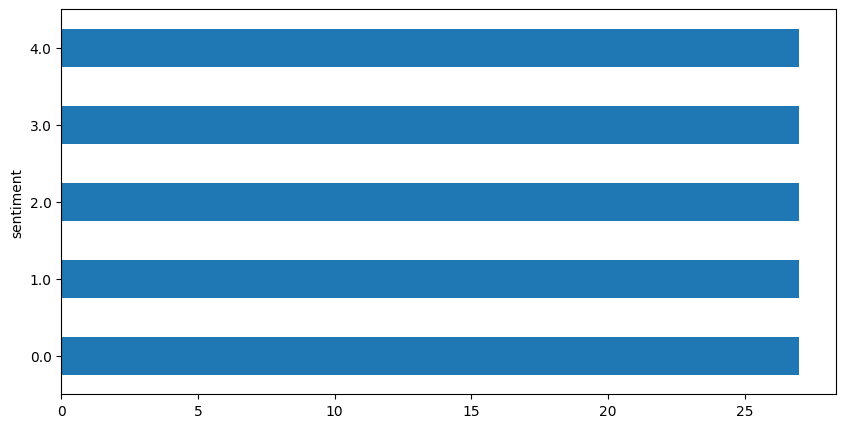

In [89]:
import matplotlib.pyplot as plt


# Use RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df_screenshot[['sentiment', 'screenshots']], df_screenshot['sentiment'])

# Plot distribution of sentiment
plt.figure(figsize=(10, 5))
pd.Series(y_resampled).value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

# Create balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=['sentiment', 'screenshots'])

# Save balanced dataframe
df_balanced.to_csv('labels_balanced.csv', index=False)

In [69]:
df_screenshot.shape

(65726, 4)

In [82]:
df_balanced.shape

(135, 2)

## Load and Preprocess Images:

- Load the images using TensorFlow's image preprocessing utilities.
- Resize the images to a standard size if necessary.
- Normalize the pixel values to a range between 0 and 1.

In [54]:
import os
import tensorflow as tf
# Function to load and preprocess images
def preprocess_image(image_name, target_size=(224, 224)):
    # Construct full image path
    image_path = os.path.join('images/', image_name)
    
    # Load image from file path
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)  # Decode image with 3 channels (RGB)
    
    # Resize image
    img = tf.image.resize(img, target_size)
    
    # Normalize pixel values
    img = img / 255.0
    
    return img


# Apply the preprocess_image function to all images in the 'screenshots' column
df_screenshot['preprocessed_images'] = df_screenshot['screenshots'].apply(preprocess_image)


## Define Your Model Architecture:

- Choose a pre-trained model architecture (e.g., VGG, ResNet, Inception) as the base model.
- Customize the top layers of the model for multiclass classification, including a softmax activation function with the appropriate number of output classes.
- Compile the model with the categorical cross-entropy loss function and an optimizer such as Adam.

In [55]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [90]:
# Convert the 'sentiment' column to string type
#df_screenshot['sentiment'] = df_screenshot['sentiment'].astype(str)
df_balanced['sentiment'] = df_balanced['sentiment'].astype(str)

# Now you can use the 'sentiment' column in the flow_from_dataframe function
train_generator = train_datagen.flow_from_dataframe(dataframe=df_screenshot,
                                                    directory='images/',
                                                    x_col='screenshots',
                                                    y_col='sentiment',
                                                    target_size=(224, 224),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = val_datagen.flow_from_dataframe(dataframe=df_screenshot,
                                                directory='images/',
                                                x_col='screenshots',
                                                y_col='sentiment',
                                                target_size=(224, 224),
                                                color_mode="rgb",
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                subset='validation')

Found 13146 validated image filenames belonging to 5 classes.
Found 13145 validated image filenames belonging to 5 classes.


Train Model:

- Train model on the training data using the fit() function.
- Monitor the training process by tracking the loss and accuracy on both the training and validation sets.
- early stopping and model checkpointing to prevent overfitting and save the best model.

In [73]:
# Choose ResNet50 as the pre-trained model
# Remove the top (classification) layers of the pre-trained model, leaving only the convolutional base.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers suitable for multiclass classification. T
# Adding a Global Average Pooling layer and a Dense layer with softmax activation for the output.
# The number of units in the Dense layer should be equal to the number of classes in the sentiment column.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# Set the number of units in the Dense layer to the number of classes in the sentiment column
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # 5 classes for sentiment

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)



In [74]:
# Freeze the convolutional base
# By freezing the convolutional base layers of the pre-trained model, you prevent them from being updated during training. 
# This is useful when you want to use the pre-trained weights as feature extractors and only train the custom top layers.
for layer in base_model.layers:
    layer.trainable = False


# Compile the model
# Use the Adam optimizer with a learning rate of 0.001 and categorical crossentropy as the loss function.
# Use accuracy as the metric to evaluate the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [75]:
from livelossplot.inputs.keras import PlotLossesCallback
# Calculate steps per epoch
# The number of steps per epoch is the total number of samples divided by the batch size
# This is used to determine how many batches to draw from the generator at each epoch
steps_per_epoch = train_generator.n // train_generator.batch_size

# Calculate validation steps
# The number of validation steps is the total number of validation samples divided by the batch size
# This is used to determine how many batches to draw from the validation generator at each epoch
validation_steps = val_generator.n // val_generator.batch_size

# Import PlotLossesCallback from keras.callbacks
# Plot loss
plot_loss = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
model_checkpoint = ModelCheckpoint('best_model.weights.h5', save_best_only=True, save_weights_only=True, verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')



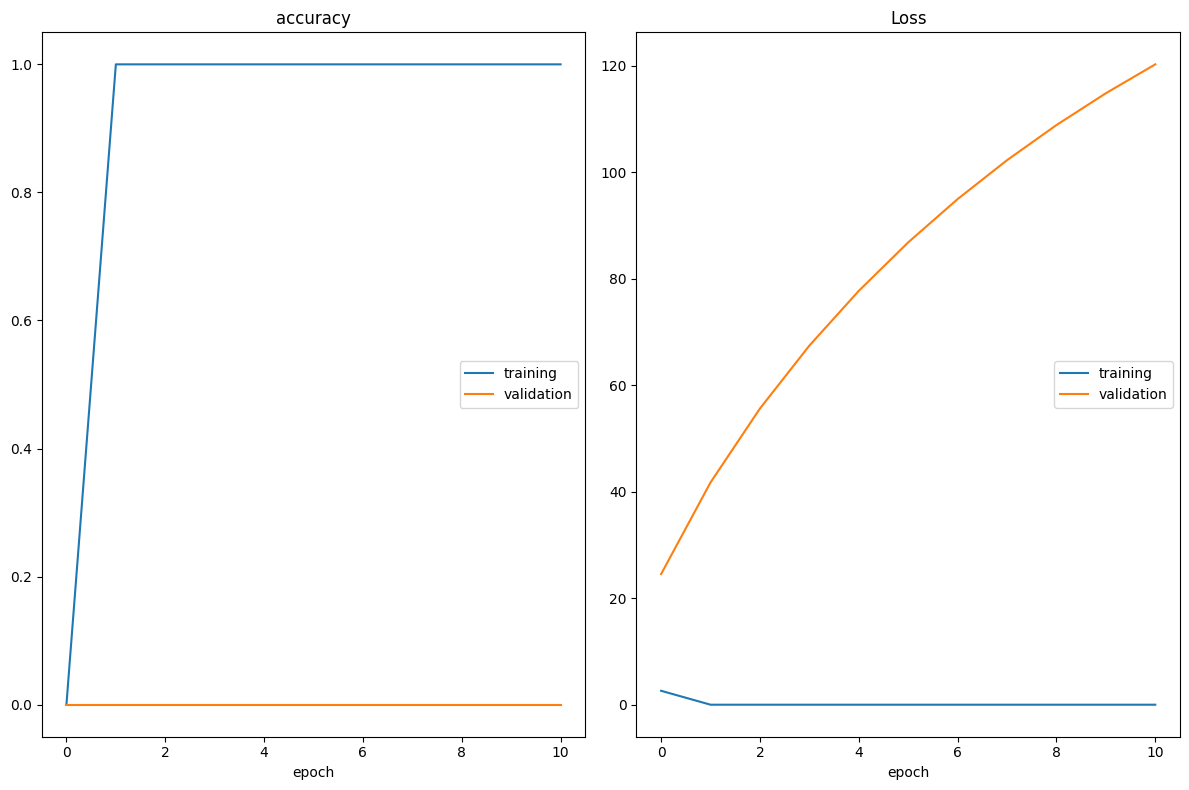

accuracy
	training         	 (min:    0.000, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.000, max:    2.612, cur:    0.000)
	validation       	 (min:   24.537, max:  120.266, cur:  120.266)

Epoch 11: val_loss did not improve from 24.53651
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 120.2664


In [76]:

# Use the fit method to train the model on the training data
# Use the validation data to evaluate the model's performance
# Use EarlyStopping to prevent overfitting and ModelCheckpoint to save the best model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    callbacks=[plot_loss, model_checkpoint, early_stop])

# Evaluate Model

In [36]:
# Load best weights from the checkpoint
model.load_weights('best_model.keras')


In [37]:
# Evaluate the model on the training and validation data
# This will give you the accuracy and loss of the model on the training and validation data.
# You can use this information to determine how well your model is performing.
# Accuracy and loss of best checkpoint
model.evaluate(train_generator)
model.evaluate(val_generator)

 19/206 ━━━━━━━━━━━━━━━━━━━━ 11:53 4s/step - accuracy: 0.3977 - loss: 1.4368

KeyboardInterrupt: 

In [ ]:
# Save model
model.save('model.h5')


Fine-Tuning and Optimization:

Experiment with hyperparameters, model architecture, and optimization techniques to improve performance.
Consider techniques such as transfer learning, learning rate scheduling, and dropout regularization to fine-tune your model.
Interpretability and Visualization:

Use techniques such as class activation maps or saliency maps to visualize which parts of the image are most important for the model's predictions.
Visualize some sample images along with their predicted sentiment labels to understand how the model is performing.
Documentation and Reporting:

Document your process, including data preprocessing steps, model architecture, training process, and evaluation results.
Report your findings, insights, and any challenges encountered during the modeling task.